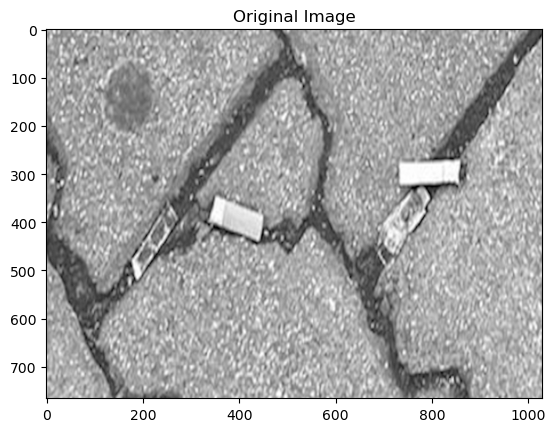

In [1330]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("photos/im7.pgm", 0)

# Display the original image
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.show()

Filtering

Applying a high kernel size Gaussian Blur filter is selected for thresholding the image better by ignoring the edges in the background for the next step.

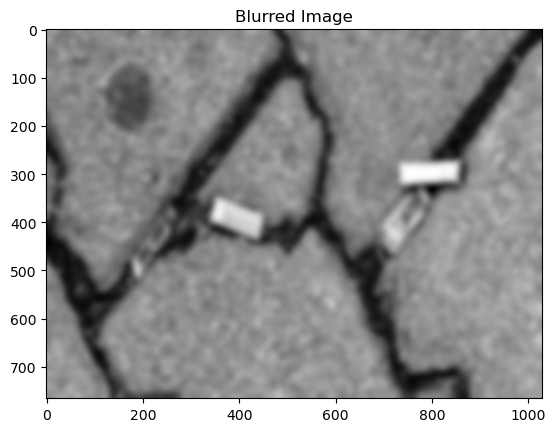

In [1331]:
# Apply blur to the image
kernelSize = 45
blurKernel = (kernelSize, kernelSize)
sigmaX = 0
blurredImage = cv2.GaussianBlur(image, blurKernel, sigmaX)

# Display the blurred image
plt.imshow(blurredImage, cmap="gray")
plt.title("Blurred Image")
plt.show()

Segmentation

Applying a global threshold to the image will result in detecting the objects.

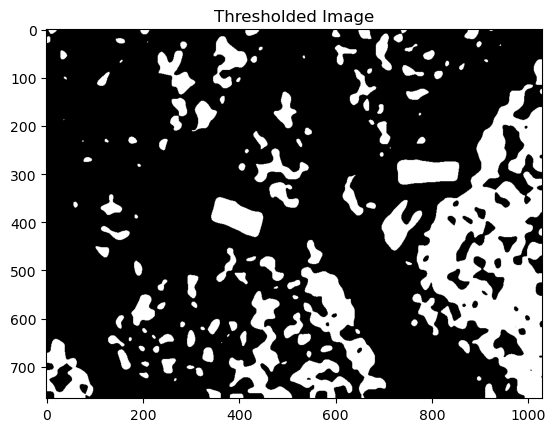

In [1332]:
# Threshold the image
_, thresholdedImage = cv2.threshold(blurredImage, 175, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholdedImage, cmap="gray")
plt.title("Thresholded Image")
plt.show()

Edge Detection

The edges were detected with the Canny Edge Detection Technique.

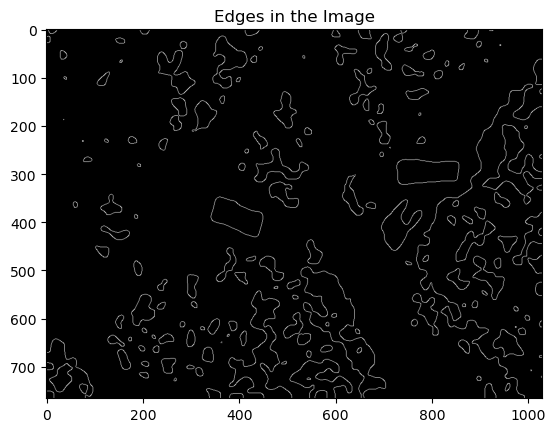

In [1333]:
# Apply Canny edge detection
edges = cv2.Canny(thresholdedImage, 0, 255)

# Display the edges
plt.imshow(edges, cmap="gray")
plt.title("Edges in the Image")
plt.show()

Morphological Operators

A closing morphological operator was applied to the image to avoid having non-continuous edges during the processing. This operator was used to detect the yellow-filter cigarette butts better by closing the gap between the white tobacco paper and the yellow filter parts.

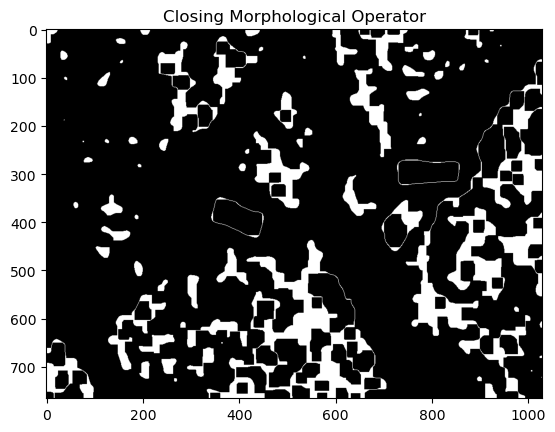

In [1334]:
kernel = np.ones((20, 20), np.uint8)

# Perform closing operation (dilation followed by erosion)
closingMorph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

plt.imshow(closingMorph, cmap="gray")
plt.title("Closing Morphological Operator")
plt.show()

Feature Extraction

Feature extraction was used by detecting the contours in the image. Then, the contour areas were calculated and thresholded by low and high area values. This is required to detect the area of a standard cigarette butt than the other areas.

In [1335]:
# Feature extraction by finding the contours
contours, _ = cv2.findContours(closingMorph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through detected contours
for contour in contours:
    # Calculate contour area
    area = cv2.contourArea(contour)

    # Set a threshold for the minimum contour area to keep
    # minArea = 4000 and maxArea = 45000 as default
    # minArea = 600 is suggested for im7
    # minArea = 5000 and maxArea = 6000 is suggested for im8
    minArea = 600  # You can adjust this threshold as needed
    maxArea = 6000  # You can adjust this threshold as needed
    x, y, w, h = cv2.boundingRect(contour)

    if area > minArea and area < maxArea:
        # For contours larger than the threshold, draw rectangles
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
        label = f"Cigarette Butt"
        cv2.putText(
            image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3
        )

Display the final result

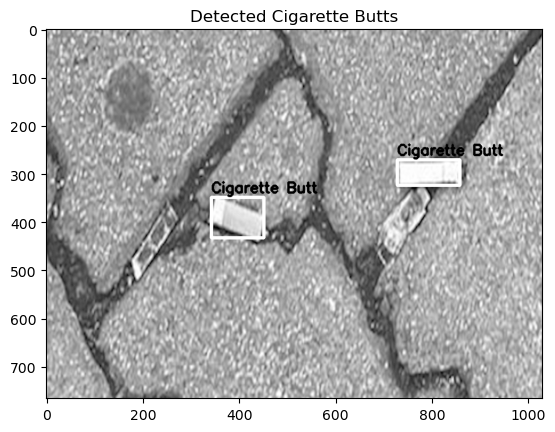

In [1336]:
# Display the image with rectangles and labels
plt.imshow(image, cmap="gray")
plt.title("Detected Cigarette Butts")
plt.show()